## Building Models 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import RFE

pd.options.display.float_format = "{:.2f}".format

In [6]:
import pandas as pd 
df=pd.read_csv('df_without_outliers.csv')

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14,Food,14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42,Drinks,4
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,Food,14
3,FDX07,19.20,Regular,0.05,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38,Food,15
4,NCD19,8.93,Non-Edible,0.05,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71,Non-Consumable,26


In [8]:
df.shape

(13600, 14)

In [44]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
New_Item_Type                0
Outlet_Years                 0
dtype: int64

In [45]:
df.duplicated().sum()

0

## Encoding 

In [46]:
# LabelEncoder for Ordinal variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df[i] = le.fit_transform(df[i]) 
    
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,0,0.02,Dairy,249.81,OUT049,1999,1,0,Supermarket Type1,3735.14,Food,14
1,DRC01,5.92,2,0.02,Soft Drinks,48.27,OUT018,2009,1,2,Supermarket Type2,443.42,Drinks,4
2,FDN15,17.50,0,0.02,Meat,141.62,OUT049,1999,1,0,Supermarket Type1,2097.27,Food,14
3,FDX07,19.20,2,0.05,Fruits and Vegetables,182.09,OUT010,1998,1,2,Grocery Store,732.38,Food,15
4,NCD19,8.93,1,0.05,Household,53.86,OUT013,1987,0,2,Supermarket Type1,994.71,Non-Consumable,26


In [47]:
# One hot encoding for Nominal Variables 
col = df[['New_Item_Type','Outlet_Type']]
col_onehot=pd.get_dummies(col,drop_first=True).astype(int)

In [48]:
col_onehot

,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,1,0,0
1,0,0,0,1,0
2,1,0,1,0,0
3,1,0,0,0,0
4,0,1,1,0,0
...,...,...,...,...,...
13595,1,0,1,0,0
13596,1,0,0,1,0
13597,0,1,1,0,0
13598,1,0,1,0,0


In [49]:
# Dropping Irrelevant Columns
df.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)

In [50]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,9.30,0,0.02,249.81,1,0,Supermarket Type1,3735.14,Food,14
1,5.92,2,0.02,48.27,1,2,Supermarket Type2,443.42,Drinks,4
2,17.50,0,0.02,141.62,1,0,Supermarket Type1,2097.27,Food,14
3,19.20,2,0.05,182.09,1,2,Grocery Store,732.38,Food,15
4,8.93,1,0.05,53.86,0,2,Supermarket Type1,994.71,Non-Consumable,26


In [51]:
df1=pd.concat([col_onehot,df],axis=1)

In [52]:
df1.head()

,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,1,0,1,0,0,9.30,0,0.02,249.81,1,0,Supermarket Type1,3735.14,Food,14
1,0,0,0,1,0,5.92,2,0.02,48.27,1,2,Supermarket Type2,443.42,Drinks,4
2,1,0,1,0,0,17.50,0,0.02,141.62,1,0,Supermarket Type1,2097.27,Food,14
3,1,0,0,0,0,19.20,2,0.05,182.09,1,2,Grocery Store,732.38,Food,15
4,0,1,1,0,0,8.93,1,0.05,53.86,0,2,Supermarket Type1,994.71,Non-Consumable,26


In [53]:
df1.drop(columns=['Outlet_Type','New_Item_Type'],axis=1,inplace=True)

In [54]:
df1.shape

(13600, 13)

In [55]:
df1.to_csv('Dataset_encoded_withoutOutliers.csv',index=False)

In [56]:
Dataset_encoded_withoutOutliers=df1[:]# created a copy of Dataset 

In [57]:
df1.head()

,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
0,1,0,1,0,0,9.30,0,0.02,249.81,1,0,3735.14,14
1,0,0,0,1,0,5.92,2,0.02,48.27,1,2,443.42,4
2,1,0,1,0,0,17.50,0,0.02,141.62,1,0,2097.27,14
3,1,0,0,0,0,19.20,2,0.05,182.09,1,2,732.38,15
4,0,1,1,0,0,8.93,1,0.05,53.86,0,2,994.71,26


In [5]:
# Rechecking outliers - After Encoding.
plt.figure(figsize=(30,10))
plt.boxplot(df1)
plt.xticks(range(1, len(df1.columns) + 1), df1.columns, rotation=60,fontsize=14)
plt.yticks(fontsize=14)

NameError: name 'df1' is not defined

<Figure size 3000x1000 with 0 Axes>

In [58]:
import sklearn.linear_model as LinearRegression
X=df1.drop('Item_Outlet_Sales',axis=1)
y=df1['Item_Outlet_Sales']

In [59]:
from scipy import stats


for col in df1.drop('Item_Outlet_Sales', axis =1).columns:
    print(f"Normality test results for col: {col}", stats.normaltest(df1[col]))

Normality test results for col: New_Item_Type_Food NormaltestResult(statistic=6579.031646652151, pvalue=0.0)
Normality test results for col: New_Item_Type_Non-Consumable NormaltestResult(statistic=3092.165560977557, pvalue=0.0)
Normality test results for col: Outlet_Type_Supermarket Type1 NormaltestResult(statistic=94543.92729417354, pvalue=0.0)
Normality test results for col: Outlet_Type_Supermarket Type2 NormaltestResult(statistic=6265.5330889379675, pvalue=0.0)
Normality test results for col: Outlet_Type_Supermarket Type3 NormaltestResult(statistic=6768.356554033651, pvalue=0.0)
Normality test results for col: Item_Weight NormaltestResult(statistic=1873.0836293342388, pvalue=0.0)
Normality test results for col: Item_Fat_Content NormaltestResult(statistic=58025.27636429646, pvalue=0.0)
Normality test results for col: Item_Visibility NormaltestResult(statistic=1203.276623941559, pvalue=5.149926247299928e-262)
Normality test results for col: Item_MRP NormaltestResult(statistic=1607.590

#### From the above we can conclude that as P value is less than .05 , we reject the null hypothesis that data is equaly distributed but as the sample size is more than 30, we will follow CLT and conclude that the data is normally distributed 

### Scaling Data 

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=143)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = pd.DataFrame(sc.fit_transform(X_train),columns = X.columns)  
X_test = pd.DataFrame(sc.transform(X_test),columns = X.columns)
X_train.shape, y_train.shape

((10880, 12), (10880,))

## RFE (Recursive  Feature Elimination)

### 1) LINEAR REGRESSION WITH 13 VARIABLES 
        1 Target Variable
        12 Independent Variable 

In [62]:
df1.shape

(13600, 13)

In [63]:
#X=df1.drop('Item_Outlet_Sales',axis=1)
#y=df1['Item_Outlet_Sales']

In [64]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=143)

In [65]:
# Splitting the dataset
#X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [66]:
# Incorrect import causing conflict
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [67]:
# Linear Regression 1

model1.fit(X_train,y_train)# fit the model on training dataset
y_pred1=model1.predict(X_test) # predicting the test dataset

In [68]:
y_pred_training = model1.predict(X_train)
print(r2_score(y_train, y_pred_training))
print(r2_score(y_test, y_pred1))

0.6527032956834486
0.6453006901304644


In [30]:
r2_val_test= r2_score(y_test,y_pred1)
r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred1)))
rmse_error_test = mean_squared_error (y_test, y_pred1, squared = False)

print ("R2 score (test) for the model is :",r2_val_test )
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)
print ("RMSE error (test) for the model is :",rmse_error_test )

R2 score (test) for the model is : 0.6453006901304644
Adjusted_R2(test) for the model is : 0.6437283252547961
RMSE error (test) for the model is : 798.7341276950112


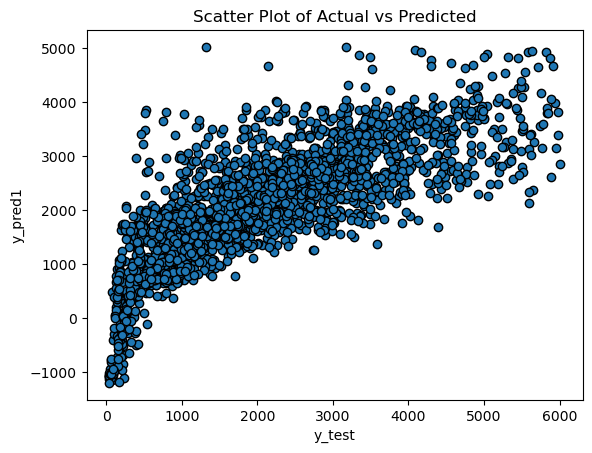

In [31]:
plt.scatter(y_test, y_pred1, edgecolor='black')
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.title("Scatter Plot of Actual vs Predicted")
plt.show()

### 1.a) Cross Validation score

In [32]:
cv=cross_val_score(model1,X_train,y_train,cv=5).mean()
cv

0.6516435532885716

In [33]:
cross_val_score(model1,X_train,y_train,cv=5)

array([0.6502692 , 0.65131371, 0.66194361, 0.64985327, 0.64483799])

In [34]:
Feature_scores = pd.DataFrame(columns=['Features', 'Model','R2', 'Adjusted R2', 'MAE', 'MSE', 'RMSE','Cross Val Score'])

In [35]:
Feature1_scores = {'Features': '13 Features', 'Model':'Linear Regression','R2': r2_score(y_test,y_pred1), \
                   'Adjusted R2':1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred1))),\
                 'MAE': mean_absolute_error(y_test,y_pred1), 'MSE': mean_squared_error(y_test,y_pred1), \
                 'RMSE': math.sqrt(mean_squared_error(y_test,y_pred1)),\
                  'Cross Val Score':cv}

In [36]:
Feature1_scores = pd.DataFrame([Feature1_scores])
Feature_scores = pd.concat([Feature_scores, Feature1_scores], ignore_index=True)
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.65,0.64,571.32,637976.21,798.73,0.65


In [37]:
i_list = []
r2_list = []
r2_adj_list=[]
rmse_list = []
cross_val_list = []

In [38]:
model = LinearRegression()
for i in range(3, 13, 2):
    rfe = RFE(model , n_features_to_select = i )
    rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    model = LinearRegression()             
    model.fit(X_train[col],y_train)
    crossvalidation = cross_val_score(model, X_train[col], y_train, cv=5, n_jobs=-1).mean()
    # predictions on the train set. 
    y_pred = model.predict(X_train[col])
    r2_val = r2_score(y_train,y_pred)
    r2_adj_val=1 - (((len(X_train[col].index) - 1) / (len(X_train[col].index) - len(X_train[col].columns) - 1)) * (1 - r2_score(y_train,y_pred)))
    rmse_error = mean_squared_error (y_train, y_pred, squared = False)
    # maintain a list for performance to analyse in future
    i_list.append(i)
    r2_list.append(r2_val)
    r2_adj_list.append(r2_adj_val)
    rmse_list.append(rmse_error)
    cross_val_list.append(crossvalidation)
    # print the outputs 
    print (i)
    print ("R2 score for the model is :",r2_val )
    print("Adjusted_R2 :",r2_adj_val)
    print ("RMSE error for the model is :",rmse_error )
    print ("Mean Cross Validation Score (r2) :",crossvalidation )
    print ("="*70)

3
R2 score for the model is : 0.5762585146351772
Adjusted_R2 : 0.5761416311802219
RMSE error for the model is : 882.2966769199681
Mean Cross Validation Score (r2) : 0.5759064195700281
5
R2 score for the model is : 0.6522486420394782
Adjusted_R2 : 0.6520887416541735
RMSE error for the model is : 799.2793052876685
Mean Cross Validation Score (r2) : 0.6517832327108483
7
R2 score for the model is : 0.6524946736838977
Adjusted_R2 : 0.6522709303722518
RMSE error for the model is : 798.9965130117972
Mean Cross Validation Score (r2) : 0.6519319843860697
9
R2 score for the model is : 0.6526677981280353
Adjusted_R2 : 0.6523802185680678
RMSE error for the model is : 798.7974613006269
Mean Cross Validation Score (r2) : 0.6517680432076086
11
R2 score for the model is : 0.6526928477829975
Adjusted_R2 : 0.6523413223252881
RMSE error for the model is : 798.7686560797615
Mean Cross Validation Score (r2) : 0.6516896664972218


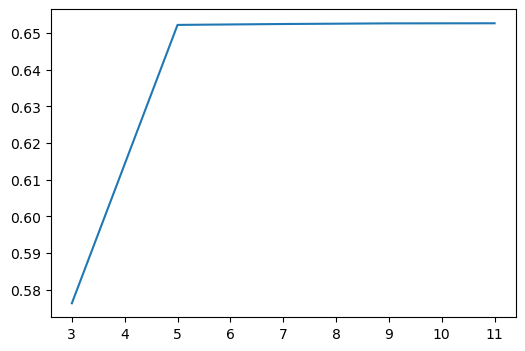

In [39]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot( x=i_list, y=r2_list, ax=ax)
plt.show()

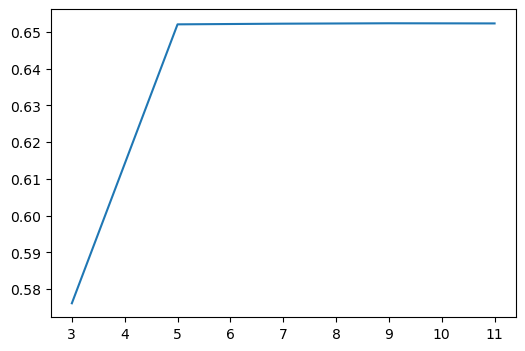

In [90]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot( x=i_list, y=r2_adj_list, ax=ax)
plt.show()

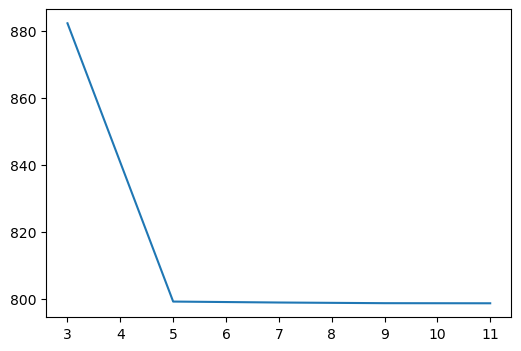

In [91]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot( x=i_list, y=rmse_list, ax=ax)
plt.show()

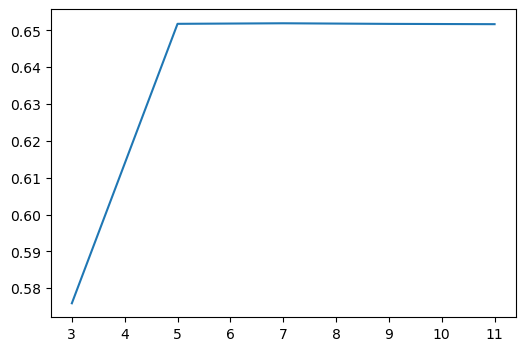

In [92]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot( x=i_list, y=cross_val_list, ax=ax)
plt.show()

## Multicollinearity Check 

In [69]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    print('Assumption 2: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (18,10))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True,annot_kws={'size':12},fmt='.2f',cmap='coolwarm')
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 2: Little to no multicollinearity among predictors


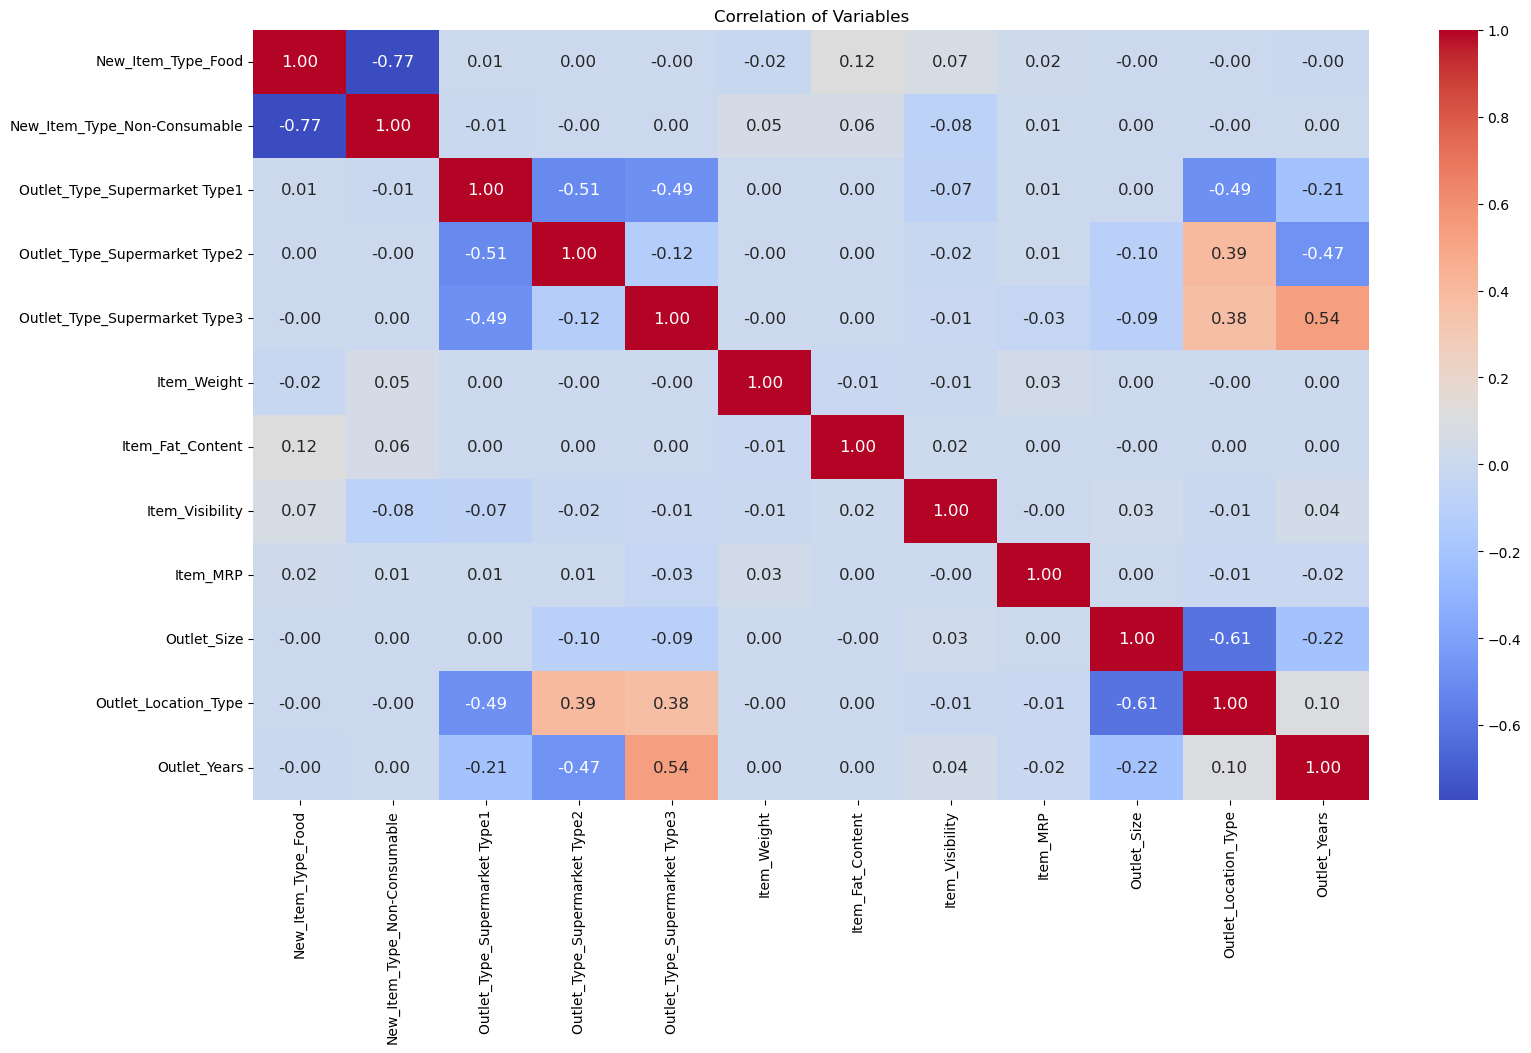

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
New_Item_Type_Food: 8.655406642770128
New_Item_Type_Non-Consumable: 3.0713739211769298
Outlet_Type_Supermarket Type1: 5.398089259483759
Outlet_Type_Supermarket Type2: 2.735655266304781
Outlet_Type_Supermarket Type3: 2.351737036129155
Item_Weight: 9.259207974434945
Item_Fat_Content: 2.154990085533005
Item_Visibility: 3.3917327576327243
Item_MRP: 5.91491830329212
Outlet_Size: 5.670872210029641
Outlet_Location_Type: 5.7041262198839355
Outlet_Years: 6.809227161424976

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [70]:
multicollinearity_assumption(df1, X, y, X.columns)

In [71]:
df1.corr()

,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
New_Item_Type_Food,1.00,-0.77,0.01,0.00,-0.00,-0.02,0.12,0.07,0.02,-0.00,-0.00,0.02,-0.00
New_Item_Type_Non-Consumable,-0.77,1.00,-0.01,-0.00,0.00,0.05,0.06,-0.08,0.01,0.00,-0.00,0.00,0.00
Outlet_Type_Supermarket Type1,0.01,-0.01,1.00,-0.51,-0.49,0.00,0.00,-0.07,0.01,0.00,-0.49,0.13,-0.21
Outlet_Type_Supermarket Type2,0.00,-0.00,-0.51,1.00,-0.12,-0.00,0.00,-0.02,0.01,-0.10,0.39,-0.04,-0.47
Outlet_Type_Supermarket Type3,-0.00,0.00,-0.49,-0.12,1.00,-0.00,0.00,-0.01,-0.03,-0.09,0.38,0.29,0.54
Item_Weight,-0.02,0.05,0.00,-0.00,-0.00,1.00,-0.01,-0.01,0.03,0.00,-0.00,0.02,0.00
Item_Fat_Content,0.12,0.06,0.00,0.00,0.00,-0.01,1.00,0.02,0.00,-0.00,0.00,0.02,0.00
Item_Visibility,0.07,-0.08,-0.07,-0.02,-0.01,-0.01,0.02,1.00,-0.00,0.03,-0.01,-0.07,0.04
Item_MRP,0.02,0.01,0.01,0.01,-0.03,0.03,0.00,-0.00,1.00,0.00,-0.01,0.61,-0.02
Outlet_Size,-0.00,0.00,0.00,-0.10,-0.09,0.00,-0.00,0.03,0.00,1.00,-0.61,-0.08,-0.22


In [72]:
df2=df1.drop('Item_Weight',axis=1)

In [73]:
#df2=pd.concat([df2,y],axis=1)
#df2=df2.iloc[:,:-1]
df2.head()

,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
0,1,0,1,0,0,0,0.02,249.81,1,0,3735.14,14
1,0,0,0,1,0,2,0.02,48.27,1,2,443.42,4
2,1,0,1,0,0,0,0.02,141.62,1,0,2097.27,14
3,1,0,0,0,0,2,0.05,182.09,1,2,732.38,15
4,0,1,1,0,0,1,0.05,53.86,0,2,994.71,26


## 2) Linear Regression with 12 Variables 
        1 target variable
        11 independent variable 

In [74]:
df2.shape

(13600, 12)

In [75]:
X=df2.drop('Item_Outlet_Sales',axis=1)
y=df2['Item_Outlet_Sales']

Assumption 2: Little to no multicollinearity among predictors


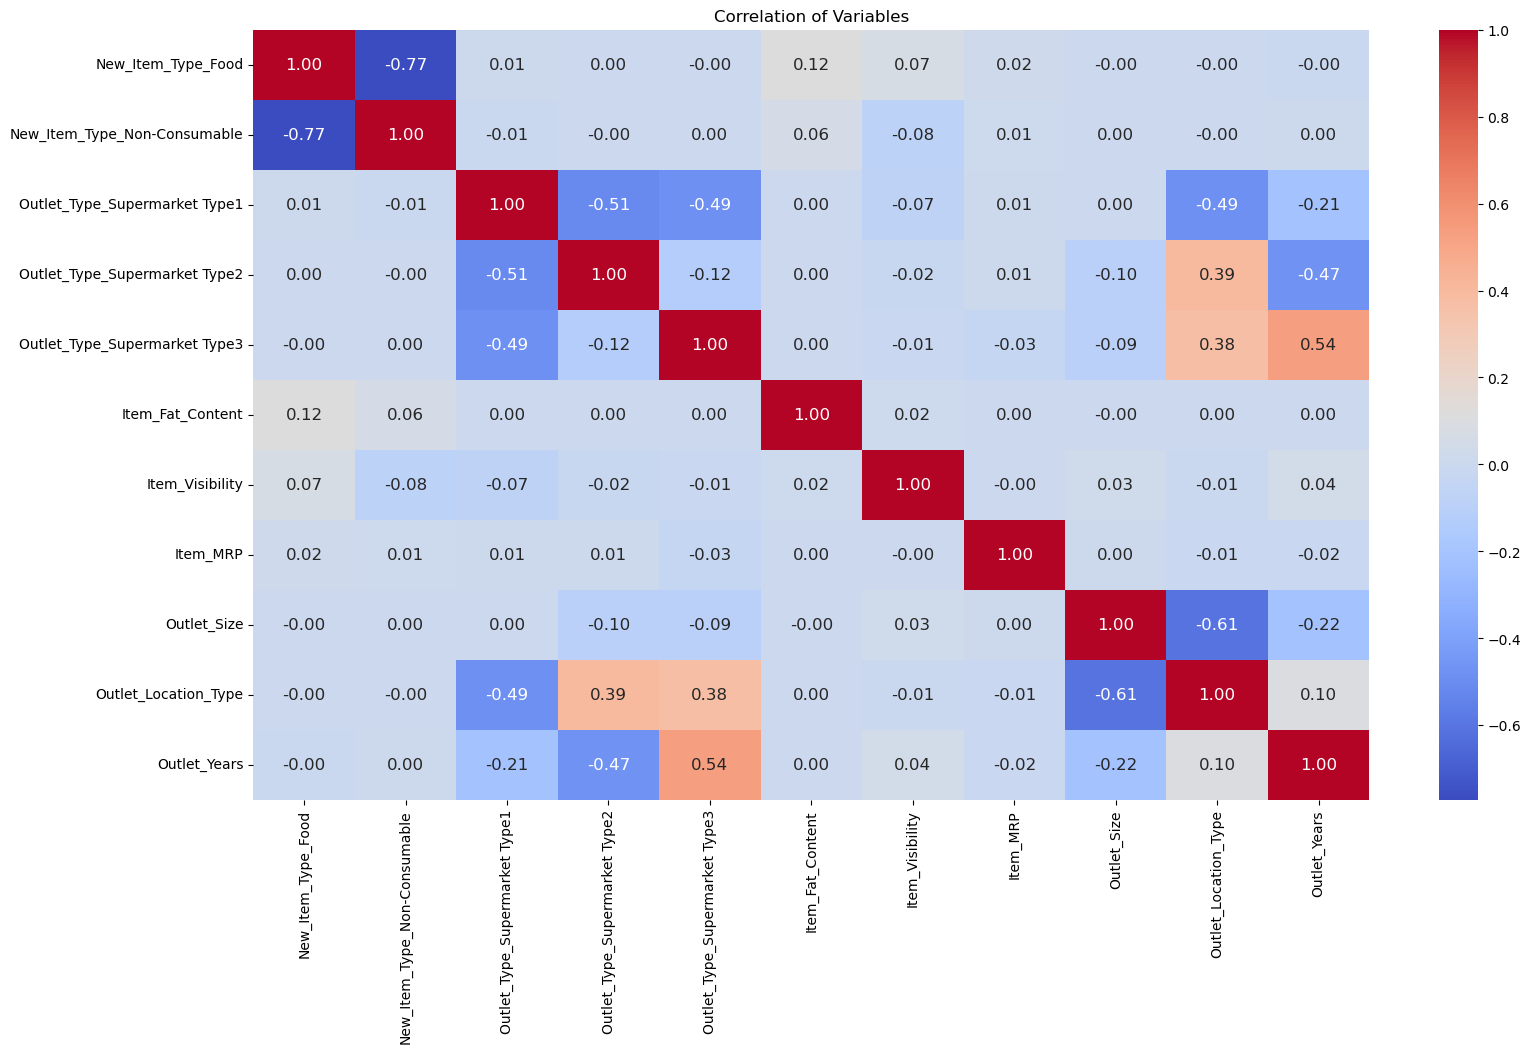

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
New_Item_Type_Food: 8.526499799743966
New_Item_Type_Non-Consumable: 3.0124078694544107
Outlet_Type_Supermarket Type1: 4.968879921841683
Outlet_Type_Supermarket Type2: 2.660999350023505
Outlet_Type_Supermarket Type3: 2.3515589344873282
Item_Fat_Content: 2.154320783630423
Item_Visibility: 3.383081253421088
Item_MRP: 5.861198276896006
Outlet_Size: 5.190345512127194
Outlet_Location_Type: 5.460941266103157
Outlet_Years: 6.431470142613753

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [76]:
# Rechecking VIF scores after dropping the column
multicollinearity_assumption(df2, X, y, X.columns)

In [77]:
# splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=143)

In [78]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10880, 11), (2720, 11), (10880,), (2720,))

In [79]:
# Linear Regression 2
model2=LinearRegression()
model2.fit(X_train,y_train)# fit the model
y_pred2=model2.predict(X_test) # predicting the test dataset

r2_val_test= r2_score(y_test,y_pred2)
r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred2)))
rmse_error_test = mean_squared_error (y_test, y_pred2, squared = False)

print ("R2 score (test) for the model is :",r2_val_test )
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)
print ("RMSE error (test) for the model is :",rmse_error_test )

R2 score (test) for the model is : 0.6453318341566165
Adjusted_R2(test) for the model is : 0.6438911584460267
RMSE error (test) for the model is : 798.6990608906194


In [80]:
y_pred_training = model2.predict(X_train)
print(r2_score(y_train, y_pred_training))
print(r2_score(y_test, y_pred2))

0.6526928477829975
0.6453318341566165


### 2.a) Cross Validation Score 

In [81]:
# Cross validation scores for the model. 
model2=LinearRegression()

cvs2 = cross_val_score(model2, X_train, y_train, cv=5, n_jobs=-1)
print(cvs2)
cvs2.mean()

[0.65024534 0.65131936 0.66220356 0.64982623 0.64485384]


0.6516896664972216

In [82]:
df3=df2[:]

In [83]:
Feature2_scores = {'Features': '12 Features', 'Model':'Linear Regression','R2': r2_score(y_test,y_pred2), \
                   'Adjusted R2':1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred2))),\
                 'MAE': mean_absolute_error(y_test,y_pred2), 'MSE': mean_squared_error(y_test,y_pred2), \
                 'RMSE': math.sqrt(mean_squared_error(y_test,y_pred2)),\
                  'Cross Val Score':cvs2.mean()}

In [84]:
Feature2_scores = pd.DataFrame([Feature2_scores])
Feature_scores = pd.concat([Feature_scores, Feature2_scores], ignore_index=True)
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.65,0.64,571.32,637976.21,798.73,0.65
1,12 Features,Linear Regression,0.65,0.64,571.33,637920.19,798.70,0.65


### Checking Collinearity 

<Axes: >

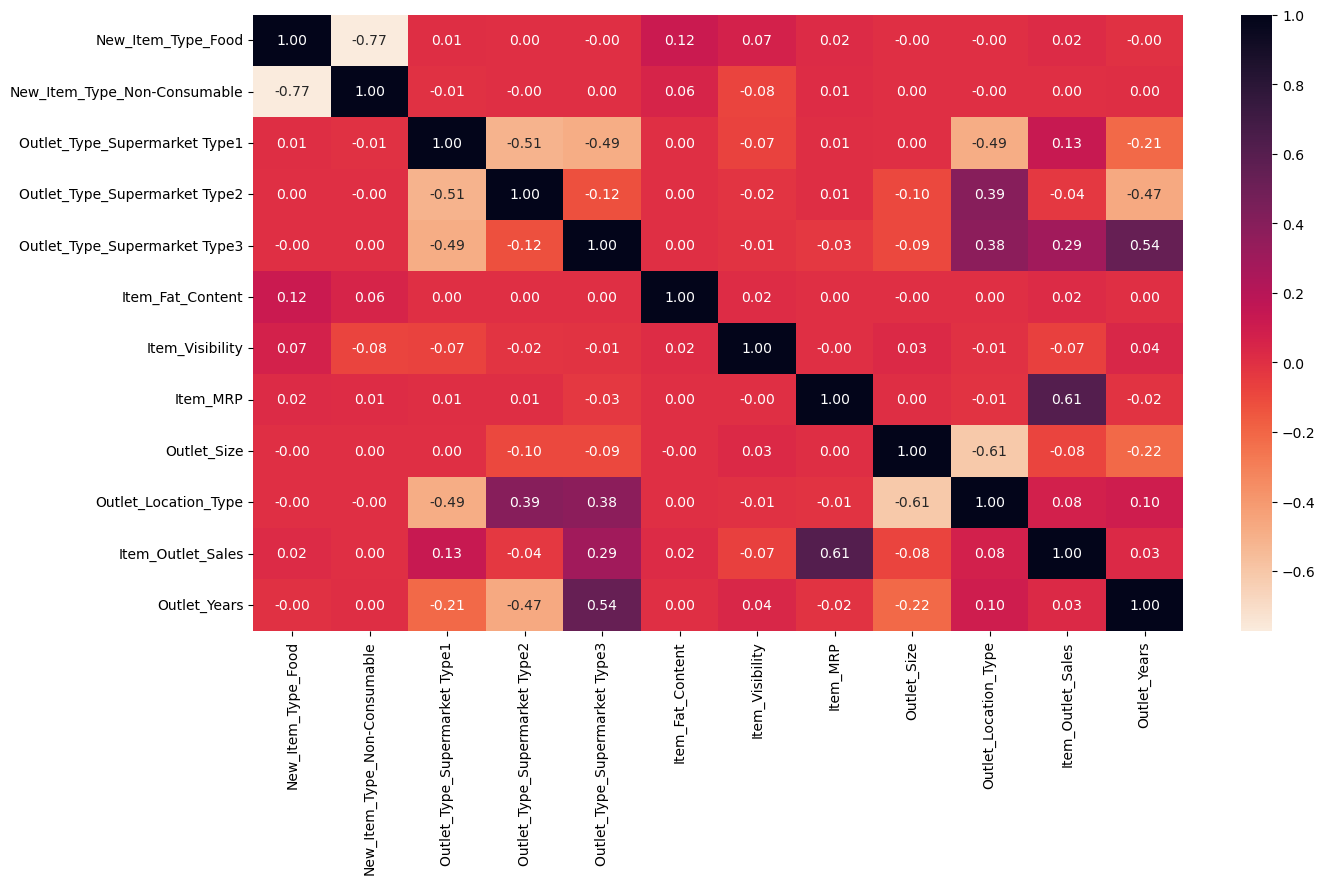

In [85]:
corr3=df3.corr()
corr3
plt.figure(figsize=(15,8))
sns.heatmap(corr3,annot=True,fmt='.2f',cmap='rocket_r')

In [86]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = df3.corr()

# Find variables with correlation greater than 0.70
highly_correlated_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.70:
            colname = correlation_matrix.columns[i]
            highly_correlated_vars.add(colname)

# Drop the highly correlated variables from the DataFrame
df_filtered = df3.drop(columns=highly_correlated_vars)

# Display the resulting DataFrame
df_filtered


,New_Item_Type_Food,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
0,1,1,0,0,0,0.02,249.81,1,0,3735.14,14
1,0,0,1,0,2,0.02,48.27,1,2,443.42,4
2,1,1,0,0,0,0.02,141.62,1,0,2097.27,14
3,1,0,0,0,2,0.05,182.09,1,2,732.38,15
4,0,1,0,0,1,0.05,53.86,0,2,994.71,26
...,...,...,...,...,...,...,...,...,...,...,...
13595,1,1,0,0,2,0.01,141.32,2,0,2213.48,16
13596,1,0,1,0,2,0.14,169.14,1,2,2349.55,4
13597,0,1,0,0,1,0.07,118.74,1,1,1892.98,11
13598,1,1,0,0,2,0.05,214.62,1,1,4533.56,6


In [87]:
df_filtered.head()

,New_Item_Type_Food,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
0,1,1,0,0,0,0.02,249.81,1,0,3735.14,14
1,0,0,1,0,2,0.02,48.27,1,2,443.42,4
2,1,1,0,0,0,0.02,141.62,1,0,2097.27,14
3,1,0,0,0,2,0.05,182.09,1,2,732.38,15
4,0,1,0,0,1,0.05,53.86,0,2,994.71,26


In [88]:
df3=df_filtered[:]

## 3) Linear Regression after checking Collinearity, with 11 variables 
        1 Target varibale 
        10 Independent Variable

In [89]:
df3.shape

(13600, 11)

In [90]:
df3.head()

,New_Item_Type_Food,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
0,1,1,0,0,0,0.02,249.81,1,0,3735.14,14
1,0,0,1,0,2,0.02,48.27,1,2,443.42,4
2,1,1,0,0,0,0.02,141.62,1,0,2097.27,14
3,1,0,0,0,2,0.05,182.09,1,2,732.38,15
4,0,1,0,0,1,0.05,53.86,0,2,994.71,26


In [91]:
df3_after_featureSelection=df3[:]# Dataset after checking the Multicolinearity and Colinearity

In [92]:
X=df3.drop('Item_Outlet_Sales',axis=1)
y=df3.Item_Outlet_Sales

In [93]:
# splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=143)

In [94]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10880, 10), (2720, 10), (10880,), (2720,))

In [95]:
# Linear Regression 3
model3=LinearRegression()
model3.fit(X_train,y_train)# fit the model
y_pred3=model3.predict(X_test) # predicting the test dataset

r2_val_test= r2_score(y_test,y_pred3)
r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred3)))
rmse_error_test = mean_squared_error (y_test, y_pred3, squared = False)

print ("R2 score (test) for the model is :",r2_val_test )
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)
print ("RMSE error (test) for the model is :",rmse_error_test )

R2 score (test) for the model is : 0.6453021940529643
Adjusted_R2(test) for the model is : 0.6439928629125176
RMSE error (test) for the model is : 798.7324343797637


In [96]:
y_pred_training = model3.predict(X_train)
print(r2_score(y_train, y_pred_training))
print(r2_score(y_test, y_pred3))

0.6526854616857853
0.6453021940529643


### 3.a) Cross Validation Score 

In [97]:
# Cross validation scores for the model. 
X=df3.drop('Item_Outlet_Sales',axis=1)
y=df3.Item_Outlet_Sales

model3=LinearRegression()

cvs3 = cross_val_score(model3, X_train, y_train, cv=5, n_jobs=-1)
print(cvs3)
cvs3.mean()

[0.65024893 0.65130284 0.66234524 0.64983925 0.64485201]


0.6517176521774939

In [121]:
Feature3_scores = {'Features': '11 Features', 'Model':'Linear Regression','R2': r2_score(y_test,y_pred3), \
                   'Adjusted R2':1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred3))),\
                 'MAE': mean_absolute_error(y_test,y_pred3), 'MSE': mean_squared_error(y_test,y_pred3), \
                 'RMSE': math.sqrt(mean_squared_error(y_test,y_pred3)),\
                  'Cross Val Score':cvs3.mean()}

In [122]:
Feature3_scores = pd.DataFrame([Feature3_scores])
Feature_scores = pd.concat([Feature_scores, Feature3_scores], ignore_index=True)
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.645301,0.643728,571.324517,637976.206745,798.734128,0.651644
1,12 Features,Linear Regression,0.645332,0.643891,571.327679,637920.189868,798.699061,0.651690
2,11 Features,Linear Regression,0.645302,0.643993,571.403579,637973.501730,798.732434,0.651718


## BACKWARD ELIMINATION

### 4) Linear Regression Model using OLS

In [98]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr1 = ols.fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2043.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:02:48   Log-Likelihood:                -88150.
No. Observations:               10880   AIC:                         1.763e+05
Df Residuals:                   10869   BIC:                         1.764e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [99]:
pvalues=lr1.pvalues
HighValue_pvalues=pvalues[pvalues>.05]
HighValue_pvalues

Item_Visibility        0.18
Outlet_Location_Type   0.26
Outlet_Years           0.46
dtype: float64

In [100]:
maxp = lr1.pvalues.max()
while(maxp > 0.05):
    print(f"Adjuste R-Square is {lr1.rsquared_adj}")
    print(f"{lr1.pvalues.idxmax()} with p-value= {maxp} was dropped\n")
    X1.drop(lr1.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y_train,X1)
    lr1 = ols.fit()
    maxp = lr1.pvalues.max()
print(lr1.summary())

Adjuste R-Square is 0.6523659156941447
Outlet_Years with p-value= 0.4572039699288615 was dropped

Adjuste R-Square is 0.6523802185680678
Item_Visibility with p-value= 0.1779033712010104 was dropped

Adjuste R-Square is 0.6523541482952834
Outlet_Location_Type with p-value= 0.17643944906396153 was dropped

Adjuste R-Square is 0.6523276847565735
New_Item_Type_Food with p-value= 0.0587690963703008 was dropped

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3402.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:03:16   Log-Likelihood:                -88154.
No. Observations:               10880   AIC:                         1.763e+05
Df Residuals:                   10873

In [101]:
df4=df3.drop(columns=['New_Item_Type_Food','Item_Visibility','Outlet_Location_Type',\
                      'Outlet_Years'],axis=1)

In [102]:
df4.head()

,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,1,0,0,0,249.81,1,3735.14
1,0,1,0,2,48.27,1,443.42
2,1,0,0,0,141.62,1,2097.27
3,0,0,0,2,182.09,1,732.38
4,1,0,0,1,53.86,0,994.71


In [103]:
df4.shape

(13600, 7)

In [105]:
lr1.params

const                           -1697.59
Outlet_Type_Supermarket Type1    1867.85
Outlet_Type_Supermarket Type2    1584.49
Outlet_Type_Supermarket Type3    2998.08
Item_Fat_Content                   25.88
Item_MRP                           13.81
Outlet_Size                        31.65
dtype: float64

## 4.1) Linear Regression with 7 variables 
        1 Target Variable
        6 Independent Variable 

In [131]:
X=df4.drop('Item_Outlet_Sales',axis=1)
y=df4.Item_Outlet_Sales

In [132]:
# splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=143)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10880, 6), (2720, 6), (10880,), (2720,))

In [133]:
# Linear Regression Model 4
model4 = LinearRegression()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)

r2_val_test= r2_score(y_test,y_pred4)
r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred4)))
rmse_error_test = mean_squared_error (y_test, y_pred4, squared = False)

print ("R2 score (test) for the model is :",r2_val_test )
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)
print ("RMSE error (test) for the model is :",rmse_error_test )

R2 score (test) for the model is : 0.6457533270571192
Adjusted_R2(test) for the model is : 0.6449698843598626
RMSE error (test) for the model is : 798.224326907592


In [134]:
y_pred_training = model4.predict(X_train)
print(r2_score(y_train, y_pred_training))
print(r2_score(y_test, y_pred4))

0.6524372200272761
0.6457533270571192


### 4.1.a)Cross Validation Score 

In [135]:
model4=LinearRegression()

cvs4 = cross_val_score(model4, X_train, y_train, cv=5, n_jobs=-1)
print(cvs4)
cvs4.mean()

[0.65009434 0.65083317 0.66299718 0.65079627 0.64495015]


0.6519342208797205

In [136]:
(abs(y_test-y_pred4)).describe()

count    2720.000000
mean      571.123128
std       557.758748
min         0.461466
25%       168.905381
50%       375.055466
75%       844.024185
max      3702.003216
Name: Item_Outlet_Sales, dtype: float64

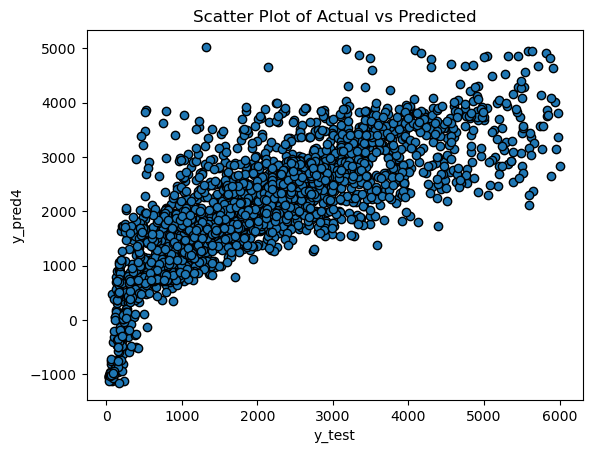

In [137]:
plt.scatter(y_test, y_pred4, edgecolor='black')
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.title("Scatter Plot of Actual vs Predicted")
plt.show()

In [138]:
Feature4_scores = {'Features': '7 Features', 'Model':'Linear Regression','R2': r2_score(y_test,y_pred4), \
                   'Adjusted R2':1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred4))),\
                 'MAE': mean_absolute_error(y_test,y_pred4), 'MSE': mean_squared_error(y_test,y_pred4), \
                 'RMSE': math.sqrt(mean_squared_error(y_test,y_pred4)),\
                  'Cross Val Score':cvs4.mean()}

In [139]:
Feature4_scores = pd.DataFrame([Feature4_scores])
Feature_scores = pd.concat([Feature_scores, Feature4_scores], ignore_index=True)
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.645301,0.643728,571.324517,637976.206745,798.734128,0.651644
1,12 Features,Linear Regression,0.645332,0.643891,571.327679,637920.189868,798.699061,0.651690
2,11 Features,Linear Regression,0.645302,0.643993,571.403579,637973.501730,798.732434,0.651718
3,7 Features,Linear Regression,0.645753,0.644970,571.123128,637162.076067,798.224327,0.651934


## Decision Tree Model 

In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
X=df4.drop('Item_Outlet_Sales',axis=1)
y=df4['Item_Outlet_Sales']
scores = []
for i in range(1,14,1):
    model = DecisionTreeRegressor(max_depth=i,random_state=0)
    kfold_score = cross_val_score(model, X_train, y_train, cv = 5).mean()
    scores.append(kfold_score)
print(scores)

[0.2768171975450623, 0.38654372899539285, 0.5217629945947098, 0.6495366655859891, 0.6804843388454348, 0.6836042289619584, 0.676709470850041, 0.6675669768159309, 0.6539258467431753, 0.6402467394939482, 0.6193749398334711, 0.600039657425482, 0.575652779700689]


In [141]:
X_train.shape

(10880, 6)

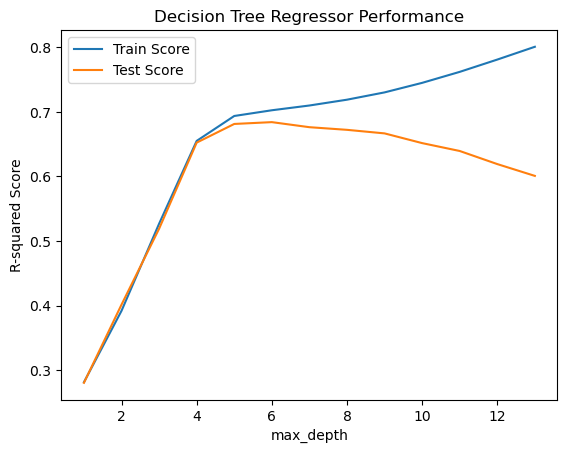

In [142]:
# Decision Tree with 5 Variables 

train_scores = []
test_scores = []

for i in range(1, 14, 1):
    model = DecisionTreeRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    
    # Training score
    y_pred_tr = model.predict(X_train)
    r2_train_set = r2_score(y_train, y_pred_tr)
    train_scores.append(r2_train_set)
    
    # Test score
    y_pred = model.predict(X_test)
    r2_test_set = r2_score(y_test, y_pred)
    test_scores.append(r2_test_set)
    

# Plotting
plt.plot(range(1, 14, 1), train_scores, label='Train Score')
plt.plot(range(1, 14, 1), test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('R-squared Score')
plt.title('Decision Tree Regressor Performance')
plt.legend()
plt.show()

In [143]:
print(r2_score(y_train, y_pred_tr))
print(r2_score(y_test, y_pred))

0.8007086725370043
0.6008176518278073


In [144]:
cvs4=cross_val_score(DecisionTreeRegressor(max_depth=5),X_train,y_train,cv=5)## with 11 Variables 
print(cvs4)
cvs4.mean()

[0.6772914  0.67604693 0.69076115 0.68295078 0.67537144]


0.6804843388454348

In [145]:
Feature5_scores = {'Features': '7 Features', 'Model':'Decision Tree Regression','R2': r2_score(y_test,y_pred), \
                   'Adjusted R2':1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))),\
                 'MAE': mean_absolute_error(y_test,y_pred), 'MSE': mean_squared_error(y_test,y_pred), \
                 'RMSE': math.sqrt(mean_squared_error(y_test,y_pred)),\
                  'Cross Val Score':cvs4.mean()}

In [146]:
Feature5_scores = pd.DataFrame([Feature5_scores])
Feature_scores = pd.concat([Feature_scores, Feature5_scores], ignore_index=True)
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.645301,0.643728,571.324517,637976.206745,798.734128,0.651644
1,12 Features,Linear Regression,0.645332,0.643891,571.327679,637920.189868,798.699061,0.651690
2,11 Features,Linear Regression,0.645302,0.643993,571.403579,637973.501730,798.732434,0.651718
3,7 Features,Linear Regression,0.645753,0.644970,571.123128,637162.076067,798.224327,0.651934
4,7 Features,Decision Tree Regression,0.600818,0.599935,570.482376,717985.158697,847.340049,0.680484


### Testing Multiple Linear Regression Assumptions

#### Linearity Assumption

In [147]:
def calculate_residuals(model, features, label):

    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']
    return df_results

In [148]:
def linear_assumption(model, features, label):

    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
    
    df_results = calculate_residuals(model, features, label)
    print('\nChecking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    fig, ax = plt.subplots(1,2,figsize = (8,4))
    sns.scatterplot(x='Actual', y='Predicted', data=df_results, ax=ax[0], color='b')
    sns.scatterplot(x='Predicted', y='Residuals', data=df_results, ax=ax[1], color='g')

    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    ax[0].plot(line_coords, line_coords, color='darkorange', linestyle='--')
    ax[1].axhline(y=0, color='darkorange', linestyle='--')
    ax[0].set_title('Actual vs. Predicted')
    ax[1].set_title('Predicted vs. Residuals')
    plt.tight_layout()
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 


Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


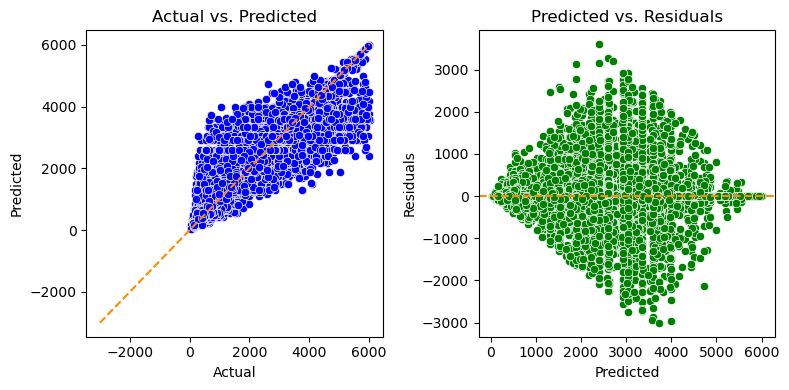

In [149]:
linear_assumption(model, X_train,y_train)

**There is a linear relationship, meet the linearity assumption.**

In [150]:
#### Normality of the Error Terms

In [151]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):

    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 3: The error terms are normally distributed', '\n')
    
    df_results = calculate_residuals(model, features, label)
    print('Using the Anderson-Darling test for normal distribution')

    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    plt.subplots(figsize=(6, 4))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 3: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\16479\AppData\Local\Temp\ipykernel_21860\1297491238.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


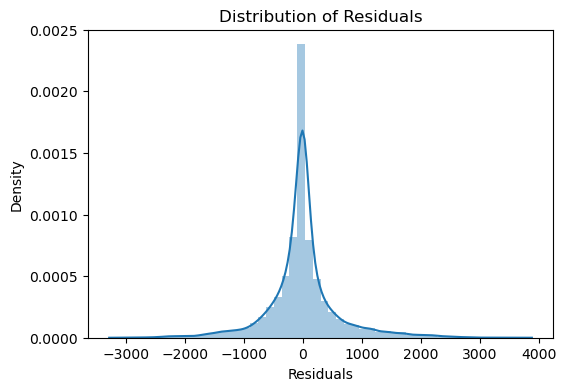


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [152]:
normal_errors_assumption(model, X_train,y_train)

Since the sample size is large enough (≥30), I can rely on the Central Limit Theorem.

### Homoscedasticity

In [153]:
def homoscedasticity_assumption(model, features, label):

    print('Assumption 4: Homoscedasticity of Error Terms', '\n')   
    print('Residuals should have relative constant variance')
        
    df_results = calculate_residuals(model, features, label)

    plt.subplots(figsize=(6, 3))
    ax = plt.subplot(111)

    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title('Residuals')
    plt.show()

Assumption 4: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


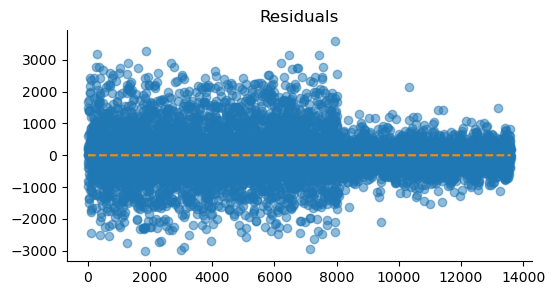

In [154]:
homoscedasticity_assumption(model,  X_train,y_train)

Generally does not violate homoscedasticity

### No Autocorrelation of the Error Terms

In [155]:
def autocorrelation_assumption(model, features, label):

    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 5: No Autocorrelation', '\n')
    
    df_results = calculate_residuals(model, features, label)
    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [156]:
autocorrelation_assumption(model,  X_train,y_train)

Assumption 5: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.971391963460134
Little to no autocorrelation 

Assumption satisfied


## Lasso Regression

In [157]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred_Lasso = lasso.predict(X_test)
r2_Lasso = r2_score(y_test, y_pred_Lasso)
print("R-squared (Lasso Regression):", r2_Lasso)

R-squared (Lasso Regression): 0.6456314028250447


In [158]:
r2_Lasso_train = r2_score(y_train, lasso.predict(X_train))
print("R-squared on Training Set (Lasso Regression):", r2_Lasso_train)

R-squared on Training Set (Lasso Regression): 0.6523732236254182


In [159]:
lasso_cross = cross_val_score(lasso, X_train, y_train, cv=5, n_jobs=-1).mean()
lasso_cross

0.6518678862735929

In [160]:
Feature6_scores = {'Features': '7 Features', 'Model':'Lasso Regression','R2': r2_score(y_test,y_pred_Lasso), \
                   'Adjusted R2':1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_Lasso))),\
                 'MAE': mean_absolute_error(y_test,y_pred_Lasso), 'MSE': mean_squared_error(y_test,y_pred_Lasso), \
                 'RMSE': math.sqrt(mean_squared_error(y_test,y_pred_Lasso)),\
                  'Cross Val Score':lasso_cross}

In [161]:
Feature6_scores = pd.DataFrame([Feature6_scores])
Feature_scores = pd.concat([Feature_scores, Feature6_scores], ignore_index=True)
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.645301,0.643728,571.324517,637976.206745,798.734128,0.651644
1,12 Features,Linear Regression,0.645332,0.643891,571.327679,637920.189868,798.699061,0.651690
2,11 Features,Linear Regression,0.645302,0.643993,571.403579,637973.501730,798.732434,0.651718
3,7 Features,Linear Regression,0.645753,0.644970,571.123128,637162.076067,798.224327,0.651934
4,7 Features,Decision Tree Regression,0.600818,0.599935,570.482376,717985.158697,847.340049,0.680484
5,7 Features,Lasso Regression,0.645631,0.644848,570.883162,637381.373813,798.361681,0.651868


## Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(random_state=143)
model_RF.fit(X_train,y_train)

y_pred_RF = model_RF.predict(X_test)
r2_RF = r2_score(y_test, y_pred_RF)
print("R-squared (Random Forest):", r2_RF)

R-squared (Random Forest): 0.6170025164852837


In [163]:
r2_RF_train = r2_score(y_train, model_RF.predict(X_train))
print("R-squared on Training Set (Random Forest):", r2_RF_train)

R-squared on Training Set (Random Forest): 0.9374909216763582


In [164]:
model_RF_cross = cross_val_score(model_RF, X_train, y_train, cv=5, n_jobs=-1).mean()
model_RF_cross

0.598978522471349

In [165]:
Feature7_scores = {'Features': '7 Features', 'Model':'Random Forest','R2': r2_score(y_test,y_pred_RF), \
                   'Adjusted R2':1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_RF))),\
                 'MAE': mean_absolute_error(y_test,y_pred_RF), 'MSE': mean_squared_error(y_test,y_pred_RF), \
                 'RMSE': math.sqrt(mean_squared_error(y_test,y_pred_RF)),\
                  'Cross Val Score':model_RF_cross}

In [166]:
Feature7_scores = pd.DataFrame([Feature7_scores])
Feature_scores = pd.concat([Feature_scores, Feature7_scores], ignore_index=True)
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.645301,0.643728,571.324517,637976.206745,798.734128,0.651644
1,12 Features,Linear Regression,0.645332,0.643891,571.327679,637920.189868,798.699061,0.651690
2,11 Features,Linear Regression,0.645302,0.643993,571.403579,637973.501730,798.732434,0.651718
3,7 Features,Linear Regression,0.645753,0.644970,571.123128,637162.076067,798.224327,0.651934
4,7 Features,Decision Tree Regression,0.600818,0.599935,570.482376,717985.158697,847.340049,0.680484
5,7 Features,Lasso Regression,0.645631,0.644848,570.883162,637381.373813,798.361681,0.651868
6,7 Features,Random Forest,0.617003,0.616155,574.240370,688874.421028,829.984591,0.598979


In [169]:
Feature_scores

,Features,Model,R2,Adjusted R2,MAE,MSE,RMSE,Cross Val Score
0,13 Features,Linear Regression,0.65,0.64,571.32,637976.21,798.73,0.65
1,12 Features,Linear Regression,0.65,0.64,571.33,637920.19,798.70,0.65
2,11 Features,Linear Regression,0.65,0.64,571.40,637973.50,798.73,0.65
3,7 Features,Linear Regression,0.65,0.64,571.12,637162.08,798.22,0.65
4,7 Features,Decision Tree Regression,0.60,0.60,570.48,717985.16,847.34,0.68
5,7 Features,Lasso Regression,0.65,0.64,570.88,637381.37,798.36,0.65
6,7 Features,Random Forest,0.62,0.62,574.24,688874.42,829.98,0.60


### Prediction :

Based on the final Linear Regression model the prediction formula will be :

**Intercept = −1697.59**

**Coefficients:**

#### Outlet_Type_Supermarket Type1=1867.85 <br>Outlet_Type_Supermarket Type2=1584.49 <br>Outlet_Type_Supermarket Type3=2998.08 <br>Item_Fat_Content=Item_Fat_Content=25.88 <br>Item_MRP =13.81 <br>Outlet_Size=31.65 <br>